In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300

In [2]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

In [3]:
trn_vc = pd.Series(np.concatenate(train[feature_cols].values)).value_counts()
tst_vc = pd.Series(np.concatenate(test[feature_cols].values)).value_counts()
all_df = pd.concat([train[feature_cols], test[feature_cols]], axis=0).reset_index(drop=True)
all_vc = pd.Series(np.concatenate(all_df.values)).value_counts()

In [5]:
trn_vals = pd.Series(np.concatenate(train[feature_cols].values))
tst_vals = pd.Series(np.concatenate(test[feature_cols].values))

trn_vals.isin(tst_vals).sum(), tst_vals.isin(trn_vals).sum(), trn_vals.isin(tst_vals).sum()/len(trn_vals), tst_vals.isin(trn_vals).sum()/len(tst_vals)

(39743710, 39883588, 0.99359275, 0.9970897)

In [6]:
train_0 = train.loc[train.target==0, feature_cols]
train_1 = train.loc[train.target==1, feature_cols]

In [7]:
trn0_vals = pd.Series(np.concatenate(train_0.values))
trn1_vals = pd.Series(np.concatenate(train_1.values))

trn0_vals.isin(trn1_vals).sum()/len(trn0_vals), trn1_vals.isin(trn0_vals).sum()/len(trn1_vals)

(0.9665748852152839, 0.9966148372972435)

In [15]:
all_vc.sort_index()

-90.2525    1
-83.6921    1
-83.1075    1
-82.2573    1
-82.1271    1
-81.4005    1
-80.8747    2
-79.8153    1
-79.6336    1
-78.9641    1
-78.7249    1
-78.6532    1
-78.3567    1
-78.3321    1
-78.2455    1
-78.0607    1
-77.6222    1
-76.5496    1
-76.5085    1
-76.3312    1
-76.2821    1
-76.1083    1
-75.8787    1
-75.8041    1
-75.7934    1
-75.5957    1
-75.5932    1
-75.3880    2
-75.3012    1
-75.2453    1
-75.1825    1
-75.1375    1
-74.9502    1
-74.7752    2
-74.6838    3
-74.5337    4
-74.4657    1
-74.4449    1
-74.4219    4
-74.2278    2
-74.1041    1
-74.0959    1
-74.0336    1
-73.9912    1
-73.9458    2
-73.9313    1
-73.8854    1
-73.8789    1
-73.8530    1
-73.8411    1
-73.8322    2
-73.7721    3
-73.7616    1
-73.7430    1
-73.7341    1
-73.7104    1
-73.6588    1
-73.6095    1
-73.5819    1
-73.5612    2
-73.5485    2
-73.5438    1
-73.4634    1
-73.2315    2
-73.1723    1
-73.0124    1
-72.9949    1
-72.9446    1
-72.9138    1
-72.8993    2
-72.8424    1
-72.80

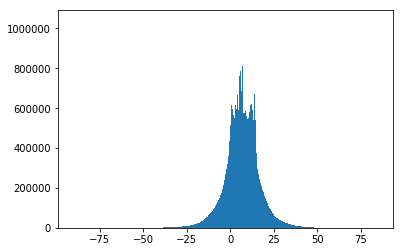

In [16]:
plt.hist(all_df.values.flatten(), bins=1000); plt.show()

In [13]:
filt0 = ~trn0_vals.isin(trn1_vals)
vc = trn0_vals[filt0].value_counts().sort_index()
vc.max(), vc

(99, -90.2525    1
 -83.1075    1
 -82.2573    1
 -82.1271    1
 -81.4005    1
 -79.6336    1
 -78.9641    1
 -78.7249    1
 -78.6532    1
 -78.3567    1
 -78.3321    1
 -78.2455    1
 -78.0607    1
 -76.5496    1
 -76.5085    1
 -76.3312    1
 -76.2821    1
 -76.1083    1
 -75.8041    1
 -75.5932    1
 -75.1825    1
 -74.4657    1
 -74.4449    1
 -74.1041    1
 -74.0959    1
 -73.9912    1
 -73.9313    1
 -73.8854    1
 -73.8789    1
 -73.8530    1
 -73.8411    1
 -73.8322    2
 -73.7616    1
 -73.7430    1
 -73.7341    1
 -73.7104    1
 -73.6588    1
 -73.6095    1
 -73.5438    1
 -73.4634    1
 -73.0124    1
 -72.9949    1
 -72.9446    1
 -72.8424    1
 -72.5964    1
 -72.5065    1
 -72.3926    1
 -72.3204    2
 -72.2357    1
 -72.0674    1
 -71.9073    1
 -71.8588    1
 -71.8029    1
 -71.7258    1
 -71.6332    1
 -71.5893    1
 -71.5468    1
 -71.4569    1
 -71.2902    1
 -71.2072    1
 -71.2060    1
 -71.1628    1
 -71.1601    1
 -71.0829    1
 -71.0670    1
 -71.0474    1
 -71.0

In [14]:
filt1 = ~trn1_vals.isin(trn0_vals)
vc = trn1_vals[filt1].value_counts().sort_index()
vc.max(), vc

(4, -77.6222    1
 -75.8787    1
 -75.5957    1
 -74.9502    1
 -73.5819    1
 -72.9138    1
 -72.6586    1
 -72.5489    1
 -72.1458    1
 -70.7407    1
 -70.1977    1
 -70.1165    1
 -69.6450    1
 -69.5533    1
 -68.9659    1
 -67.8577    1
 -67.6358    1
 -67.5368    1
 -66.8461    1
 -66.5565    1
 -66.3198    1
 -66.1231    1
 -66.0179    1
 -65.7968    1
 -65.6660    1
 -65.6158    1
 -65.6079    1
 -65.3963    1
 -65.3197    1
 -65.2900    1
 -65.1799    1
 -65.1351    1
 -65.0976    1
 -65.0253    1
 -65.0157    1
 -64.9018    1
 -64.8670    1
 -64.7066    1
 -64.5661    1
 -64.4176    1
 -64.4002    1
 -64.3976    1
 -64.3368    1
 -64.2926    1
 -64.2379    1
 -64.1540    1
 -64.1347    1
 -64.1318    1
 -64.0620    1
 -63.7976    1
 -63.7011    1
 -63.6650    1
 -63.4575    1
 -63.4443    1
 -63.4327    1
 -63.3369    1
 -63.2334    1
 -63.1854    1
 -63.1176    1
 -63.1078    1
 -63.1058    1
 -63.0072    1
 -62.8268    1
 -62.7864    1
 -62.6909    1
 -62.6800    1
 -62.67

In [17]:
tst_vals.value_counts().sort_index()

-83.6921    1
-80.8747    2
-79.8153    1
-75.7934    1
-75.3880    2
-75.3012    1
-75.2453    1
-75.1375    1
-74.7752    2
-74.6838    3
-74.5337    4
-74.4219    4
-74.2278    2
-74.0336    1
-73.9458    2
-73.7721    3
-73.5612    2
-73.5485    2
-73.2315    2
-73.1723    1
-72.8993    2
-72.8084    2
-72.7087    1
-72.4658    1
-72.4039    3
-72.2517    1
-72.2013    2
-72.1376    5
-72.1169    1
-71.8380    3
-71.7117    3
-71.6573    1
-71.3832    1
-71.3234    1
-71.2434    1
-71.0334    2
-71.0129    3
-70.9503    2
-70.9263    2
-70.8424    3
-70.7792    3
-70.7583    3
-70.7037    1
-70.5153    2
-70.3708    2
-70.3228    1
-70.1284    2
-69.9817    2
-69.8458    1
-69.7946    2
-69.7599    3
-69.7570    4
-69.7542    1
-69.6829    2
-69.5743    2
-69.4696    1
-69.4397    5
-69.3777    1
-69.3537    5
-69.3409    2
-69.3242    1
-69.2355    5
-69.1818    1
-68.9513    3
-68.8840    2
-68.7750    1
-68.7394    2
-68.4720    3
-68.4436    2
-68.4129    4
-68.3566    1
-68.34